# UN Data Exploration for NSS Data Science - Abigail Ezell

### 3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [34]:
gdp_df=pd.read_csv("../data/gdp_per_capita.csv")

In [35]:
gdp_df.head(n=10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [36]:
gdp_df.tail(n=10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


### 5. Dropping the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [37]:
gdp_df = (
    gdp_df
    .drop(columns='Value Footnotes')
    .rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
)

### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [38]:
gdp_df.shape

(8219, 3)

In [39]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

*The data type for the 'Country' column is 'object', which is the pandas datatype used for text or mixed numeric and non-numeric values. To explicitly convert the countries data to the string data type, we could run the following:*

In [40]:
gdp_df['Country'] = gdp_df['Country'].astype("string")
# Validate Country data was converted to string
print(gdp_df['Country'].dtype)

string


### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [48]:
gdp_df['Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990])

*The dataset contains data from 1990 to 2023.*

In [50]:
gdp_df['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

*There are more observations as the years increase, indicating the addition of new countries over the years.*

### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [51]:
gdp_df['Country'].unique()

<StringArray>
[                'Afghanistan', 'Africa Eastern and Southern',
  'Africa Western and Central',                     'Albania',
                     'Algeria',                     'Andorra',
                      'Angola',         'Antigua and Barbuda',
                  'Arab World',                   'Argentina',
 ...
         'Upper middle income',                     'Uruguay',
                  'Uzbekistan',                     'Vanuatu',
                    'Viet Nam',              'Virgin Islands',
          'West Bank and Gaza',                       'World',
                      'Zambia',                    'Zimbabwe']
Length: 247, dtype: string

*There are 247 unique countries represented in the dataset.*

In [53]:
gdp_df['Country'].value_counts().tail()

Country
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: Int64

*I would assume Djibouti, Turks and Caicos, Sint Maarten, and Kosovo have the fewest observations either because they are relatively new countries, or because they are very small countries that might not have the resources to regularly gather GDP data.*

### 9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [57]:
gdp_2021 = gdp_df[ gdp_df['Year'] == 2021 ]

### 10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [59]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

### Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

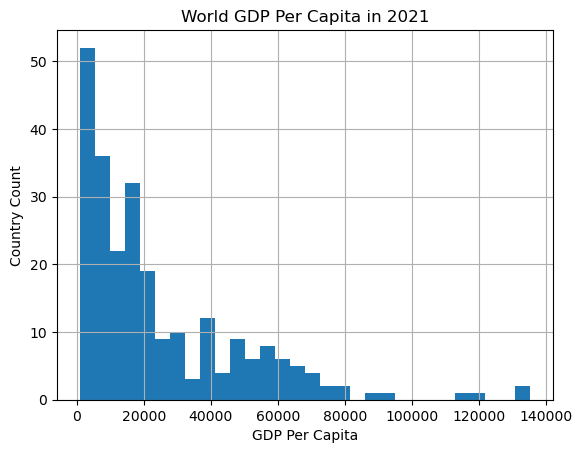

In [74]:
gdp_2021["GDP_Per_Capita"].hist(bins=30)
plt.title('World GDP Per Capita in 2021')
plt.xlabel('GDP Per Capita')
plt.ylabel('Country Count')
plt.show()

*The distribution has a pronounced right skew, with a relatively small number of countries having a very large GDP per capita. The frequency peaks in the leftmost bin of the histogram, around 0-10,000 GDP per capita.

### Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [77]:
# Top 5 countries by GDP per capita in 2021
gdp_2021.sort_values(by='GDP_Per_Capita').tail()

,Country,Year,GDP_Per_Capita
740,Bermuda,2021,92276.234605
6118,Qatar,2021,116832.570290
3492,Ireland,2021,118594.746862
6513,Singapore,2021,131864.092336
4425,Luxembourg,2021,135379.291201


In [79]:
# Bottom 5 countries by GDP per capita in 2021
gdp_2021.sort_values(by='GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


### Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

### Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

### How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?